<h1 dir="rtl" align="center">
به نام خدا
    <br>
دانیال عرفانیان
    <br>
    ۹۷۱۱۰۱۵۵
    <br>
بررسی داده های قرآنی
</h1>

In [45]:
import glob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
stopwords = set(STOPWORDS)
english_texts = ''
for file in sorted(glob.glob("quran_text/english/*.txt")):
    with open(file) as f:
        english_texts = english_texts.strip() + '\n' + f.read().strip()

In [18]:
import glob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
stopwords = set(STOPWORDS)
arabic_texts = ''
for file in sorted(glob.glob("quran_text/arabic/*.txt")):
    with open(file) as f:
        arabic_texts = arabic_texts.strip() + '\n' + f.read().strip()

In [25]:
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar

from camel_tools.utils.normalize import normalize_alef_bw
from camel_tools.utils.normalize import normalize_alef_hsb

from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar

def normalize_arabic(sentence):

    # Normalize alef variants to 'ا'
    sent_norm = normalize_unicode(sentence)
    
    sent_norm = normalize_alef_bw(sent_norm)
    # Normalize alef variants to 'ا'
    sent_norm = normalize_alef_ar(sentence)

    # Normalize alef maksura 'ى' to yeh 'ي'
    sent_norm = normalize_alef_maksura_ar(sent_norm)

    # Normalize teh marbuta 'ة' to heh 'ه'
    sent_norm = normalize_teh_marbuta_ar(sent_norm)
    return dediac_ar(sent_norm)

In [40]:
import codecs

stopwords_path = 'quran_text/quranic_stopwords.txt'
stopwords = [x.strip() for x in codecs.open(stopwords_path,'r','utf-8').readlines()]
stopwords = stopwords + [normalize_arabic(x.strip()) for x in codecs.open(stopwords_path,'r','utf-8').readlines()]
normalized_arabic = ' '.join([word for word in normalize_arabic(arabic_texts).split() if word not in stopwords])

In [43]:
def create_word_cloud(text):
    wordcloud = WordCloud(width = 800, height = 800, font_path='./fonts/Amiri Bold.ttf',
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

<h3 dir="rtl">
    کلمات پر کاربرد در متن عربی کل قرآن:
</h3>

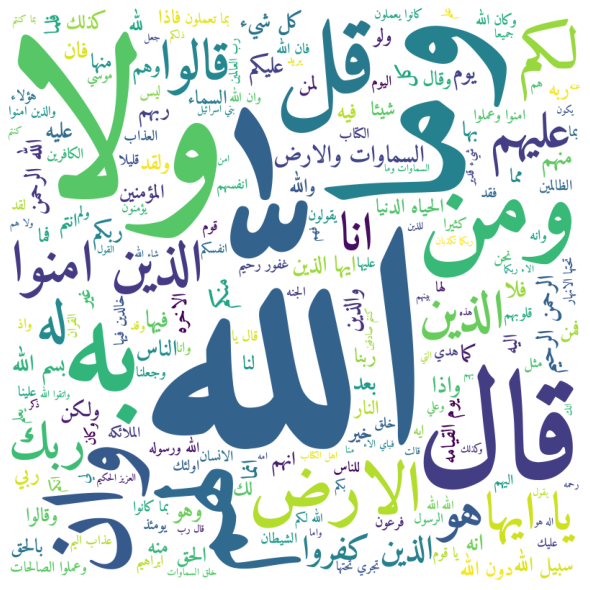

In [46]:
create_word_cloud(normalized_arabic)

<h3 dir="rtl">
    کلمات پر کاربرد در ترجمه انگلیسی کل قرآن:
</h3>

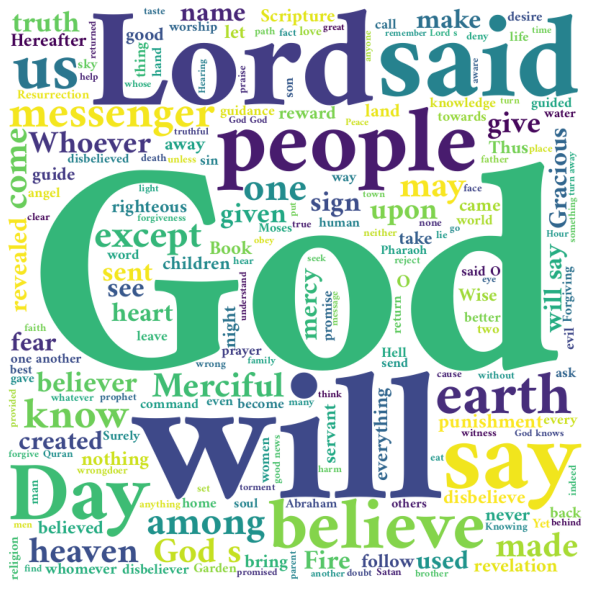

In [47]:
create_word_cloud(english_texts)

<hr/>


<h2 dir="rtl" align="center">
بررسی سوره های فجر و الحاقه
</h2>

In [58]:
def clean_ayah(text):
    return ' '.join([word for word in normalize_arabic(text.strip()).split() if word not in stopwords])
def clean_surah(texts):
    return [clean_ayah(ayah) for ayah in texts]

with open('./quran_text/arabic/089.txt') as f:
    fajr_text = f.readlines()
fajr_text = clean_surah(fajr_text)

with open('./quran_text/arabic/069.txt') as f:
    elhagheh_text = f.readlines()
elhagheh_text = clean_surah(elhagheh_text)

In [61]:
print(fajr_text)
print("-"*100)
print(elhagheh_text)

['بسم الله الرحمن الرحيم', 'والفجر', 'وليال عشر', 'والشفع والوتر', 'والليل اذا يسر', 'هل في ذلك قسم لذي حجر', 'الم تر كيف فعل ربك بعاد', 'ارم ذات العماد', 'التي لم يخلق مثلها في البلاد', 'وثمود الذين جابوا الصخر بالواد', 'وفرعون ذي الاوتاد', 'الذين طغوا في البلاد', 'فاكثروا فيها الفساد', 'فصب عليهم ربك سوط عذاب', 'ان ربك لبالمرصاد', 'فاما الانسان اذا ما ابتلاه ربه فاكرمه ونعمه فيقول ربي اكرمن', 'واما اذا ما ابتلاه فقدر عليه رزقه فيقول ربي اهانن', 'كلا ۖ بل لا تكرمون اليتيم', 'ولا تحاضون علي طعام المسكين', 'وتاكلون التراث اكلا لما', 'وتحبون المال حبا جما', 'كلا اذا دكت الارض دكا دكا', 'وجاء ربك والملك صفا صفا', 'وجيء يومئذ بجهنم ۚ يومئذ يتذكر الانسان واني له الذكري', 'يقول يا ليتني قدمت لحياتي', 'فيومئذ لا يعذب عذابه احد', 'ولا يوثق وثاقه احد', 'يا ايتها النفس المطمئنه', 'ارجعي الي ربك راضيه مرضيه', 'فادخلي في عبادي', 'وادخلي جنتي']
----------------------------------------------------------------------------------------------------
['بسم الله الرحمن الرحيم', 'الحاقه', 'ما الحاقه', 'وما 

<hr/>


<div dir="rtl" style="font-size: 16px">
برای بررسی شباهت متن و پیدا کردن قسمت هایی که به موضوعات یکسانی اشاره دارند من ۲ ایده دارم:
    <br>
    <ul>
    <li>
        ایده ۱: پیدا کردن شباهت دو به دو بین آیه های سوره ها
    </li>
    <li>
        ایده ۲: تلاش کنیم یک قسمت ۱۵ کلمه ای که معانی نزدیکی دارند را پیدا کنیم
    </li>
    </ul>
    ما در اینجا سعی میکنیم هر دو ایده را پیاده کنیم
</div>